In [137]:
import pandas as pd
import numpy as np
import os
from re import search
import codecs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import missingno as msno

# Read Input Datasets

In [5]:
auto_ind = pd.read_csv('train/automobile_industry.csv')
comp_ind = pd.read_csv('train/computer_industry.csv')
health_ind = pd.read_csv('train/health_industry.csv')
manu_ind = pd.read_csv('train/manufacturing_industry.csv')
power_ind = pd.read_csv('train/power_industry.csv')


In [58]:
arr = os.listdir('train/product_info')
strtxt = ".txt"
all_product_info = pd.DataFrame()
for txtfile in arr:
    if txtfile.__contains__(strtxt):
        file_add = str('train/product_info/')+str(txtfile)
        fileObject = open(file_add, "r", encoding="unicode_escape")
        data = fileObject.read()
        product_info_data = pd.DataFrame([[txtfile.replace(strtxt,'') ,data]],columns = ['ID','product_info'])
        all_product_info = all_product_info.append(product_info_data)

# Data Pre Processing

In [46]:
auto_ind['industry']='Automobile'
comp_ind['industry']='Computer'
health_ind['industry']='Health'
manu_ind['industry']='Manufacturing'
power_ind['industry']='Power'

In [62]:
auto_ind = auto_ind.merge(all_product_info, on='ID', how='left')
comp_ind = comp_ind.merge(all_product_info, on='ID', how='left')
health_ind = health_ind.merge(all_product_info, on='ID', how='left')
manu_ind = manu_ind.merge(all_product_info, on='ID', how='left')
power_ind = power_ind.merge(all_product_info, on='ID', how='left')

In [63]:
combined_data = pd.concat([auto_ind,comp_ind,health_ind,manu_ind,power_ind])

In [ ]:
category_map = combined_data[['Type','Product','industry']].drop_duplicates()
category_map['category'] = range(1,len(category_map)+1)

In [83]:
prep_df = combined_data.merge(category_map,on = ['Type','Product','industry'], how='inner')
prep_df = prep_df.drop(['Type','Product','industry'],axis =1 )

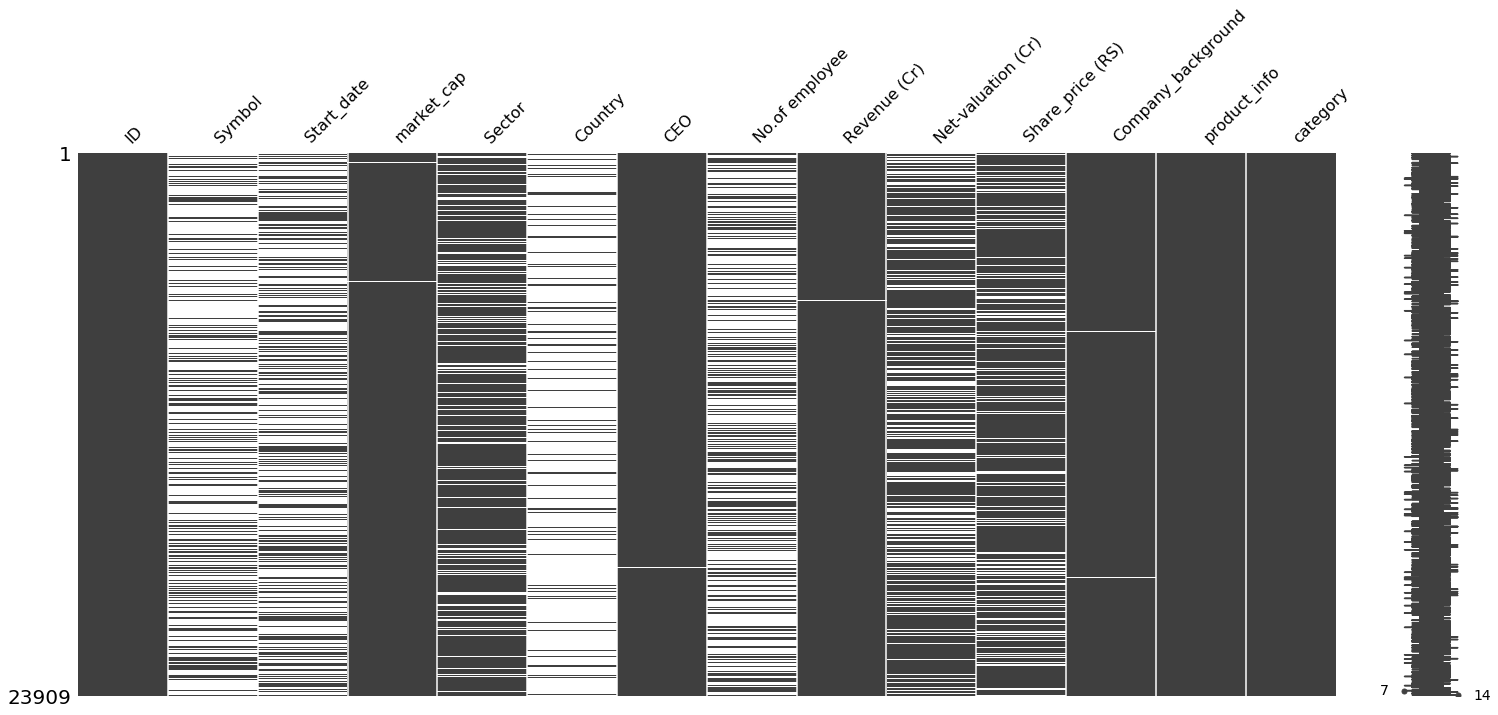

In [138]:
msno.matrix(prep_df)

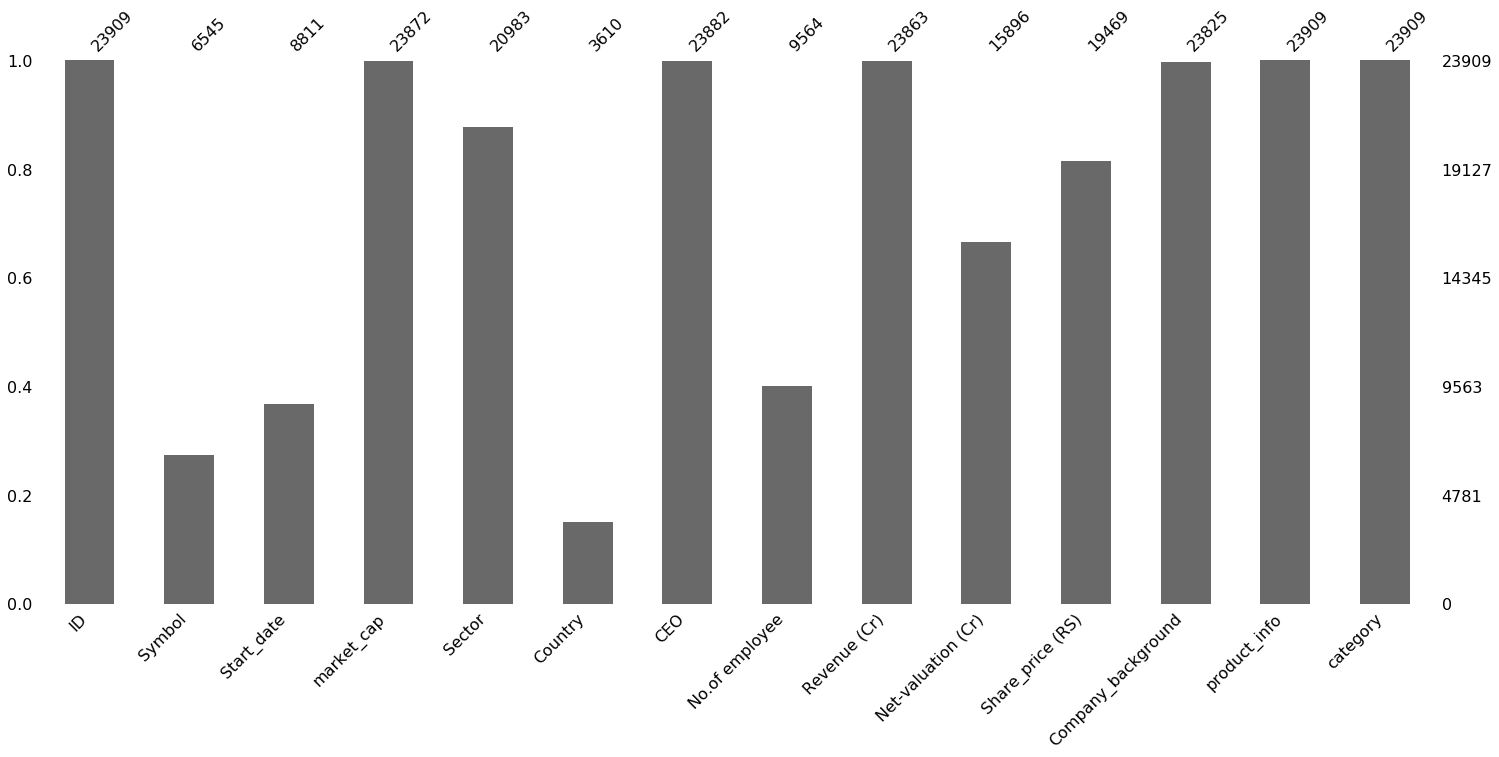

In [139]:
msno.bar(prep_df)

In [144]:
prep_df[['CEO','Revenue (Cr)']].nunique()

CEO              8570
Revenue (Cr)    14472
dtype: int64

In [142]:
prep_df

,ID,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Company_background,product_info,category
0,PROJ0x5377,NaN,NaN,?,Private_sector,Guatemala,Pamela Terrano,NaN,15.226766068690289,2284.014910,325.20,The LCV concept was created as a compact truc...,5 million in 2019).36 mph (605.he just envisio...,1
1,PROJ0x5919,NaN,NaN,?,?,NaN,Robert Parnell,16110.0,-999.0,NaN,240.40,Fujian Motors Group holds a 15% stake in King ...,"As it turned out, the bike held up, and Larry ...",1
2,PROJ0x757b,NaN,NaN,large-cap,Public_sector,Tunisia,?,20415.0,8.03507655315908,2008.769138,NaN,8 million units. Product recalls happen in eve...,"Robert Pradke of Eastford, Connecticut applied...",1
3,PROJ0x5128,NaN,NaN,large-cap,?,NaN,?,51156.0,7.2907155444188145,NaN,656.35,FCA holds a 10% stake in Ferrari.Dongfeng Moto...,Its Splendor model has sold more than 8. Such ...,1
4,PROJ0x68a7,NaN,NaN,large-cap,Public_sector,NaN,Catrina Watson,NaN,12.49960277935214,1874.940417,NaN,Mahindra & Mahindra and Navistar International...,"Bambi relates in the biography, Indian Larry: ...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23904,PROJ0x304d,NaN,NaN,?,Public_sector,NaN,Jennifer Hogan,9792.0,?,8929.065189,240.55,Electricity retailing is the final sale of ele...,Excess credits upon termination of service are...,75
23905,PROJ0x7aae,NaN,NaN,?,?,Martinique,?,NaN,7.969776284831432,NaN,165.70,If the biomass source is agricultural or muni...,The higher the required discharge rate of a ba...,75
23906,PROJ0x7621,NaN,NaN,?,NaN,NaN,?,7841.0,-999.0,200.018955,295.15,"wholesale power market to new players, with t...","The ""Dover House"" (in Dover, Massachusetts) wa...",75
23907,PROJ0x755c,NaN,NaN,?,Private_sector,NaN,?,24449.0,1.9584663951467816,13887.742897,415.10,5% of final energy demand for heating and cool...,A smart battery has voltage monitoring circuit...,75


In [107]:
y = prep_df['category']
x = prep_df.drop('category',axis = 1)
#x = prep_df.drop('product_info',axis = 1)

In [120]:
x['ID'] = x['ID'].str[6:]

In [124]:
x['ID'] = x['ID'].factorize()[0]

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [133]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='unicode_escape', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(x.Company_background).toarray()
labels = df.ID
features.shape

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [126]:
x_train, x_test, y_train, y_test = train_test_split(
 x, y, test_size=0.2, random_state=42)

In [127]:
clf = RandomForestClassifier(n_estimators = 20, 
                             max_features = 'n_features', 
                             max_depth = 20, 
                             min_samples_split = 2, 
                             min_samples_leaf = 2, 
                             bootstrap = True,
                             oob_score = True)

In [128]:
clf.fit(x_train,y_train)

ValueError: could not convert string to float: 'ISA'

In [129]:
x

,ID,Symbol,Start_date,market_cap,Sector,Country,CEO,No.of employee,Revenue (Cr),Net-valuation (Cr),Share_price (RS),Company_background,product_info
0,0,NaN,NaN,?,Private_sector,Guatemala,Pamela Terrano,NaN,15.226766068690289,2284.014910,325.20,The LCV concept was created as a compact truc...,5 million in 2019).36 mph (605.he just envisio...
1,1,NaN,NaN,?,?,NaN,Robert Parnell,16110.0,-999.0,NaN,240.40,Fujian Motors Group holds a 15% stake in King ...,"As it turned out, the bike held up, and Larry ..."
2,2,NaN,NaN,large-cap,Public_sector,Tunisia,?,20415.0,8.03507655315908,2008.769138,NaN,8 million units. Product recalls happen in eve...,"Robert Pradke of Eastford, Connecticut applied..."
3,3,NaN,NaN,large-cap,?,NaN,?,51156.0,7.2907155444188145,NaN,656.35,FCA holds a 10% stake in Ferrari.Dongfeng Moto...,Its Splendor model has sold more than 8. Such ...
4,4,NaN,NaN,large-cap,Public_sector,NaN,Catrina Watson,NaN,12.49960277935214,1874.940417,NaN,Mahindra & Mahindra and Navistar International...,"Bambi relates in the biography, Indian Larry: ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23904,23904,NaN,NaN,?,Public_sector,NaN,Jennifer Hogan,9792.0,?,8929.065189,240.55,Electricity retailing is the final sale of ele...,Excess credits upon termination of service are...
23905,23905,NaN,NaN,?,?,Martinique,?,NaN,7.969776284831432,NaN,165.70,If the biomass source is agricultural or muni...,The higher the required discharge rate of a ba...
23906,23906,NaN,NaN,?,NaN,NaN,?,7841.0,-999.0,200.018955,295.15,"wholesale power market to new players, with t...","The ""Dover House"" (in Dover, Massachusetts) wa..."
23907,23907,NaN,NaN,?,Private_sector,NaN,?,24449.0,1.9584663951467816,13887.742897,415.10,5% of final energy demand for heating and cool...,A smart battery has voltage monitoring circuit...
